In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
file_path = Path("all_features.csv")
combined_df = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
combined_df.sort_index(inplace=True)

In [24]:
#combined_df

In [4]:
combined_df['target_return'] = combined_df['return'].shift(-1)
combined_df = combined_df.dropna()

In [25]:
#combined_df

In [26]:
X = combined_df[['return', 'Beta', 'WR', 'RSI', 'OBV', 'sentiment_vader', 'sentiment_rnn', 'us2y10y', 'vix', 'usdjpy']]

In [27]:
#y = combined_df[['target_return']]

In [28]:
target = combined_df.iloc[:,13]

In [29]:
#y = np.array(ya).reshape(-1, 1).ravel()
y = target.values.reshape(-1, 1)

In [30]:
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [31]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [32]:
model = LinearRegression()
model.fit(X_binary_encoded, y)

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, est.predict(X_test))

0.00031478102521340616

In [15]:
y_pred = est.predict(X_test)

In [16]:
y_pred

array([0.24482699, 0.24277098, 0.24190579, ..., 0.2646473 , 0.26195103,
       0.25984562])

In [17]:
output = pd.DataFrame({"target": y_test.ravel(), "estimated": y_pred})

In [18]:
predicted_prices = scaler.inverse_transform(y_pred.reshape(-1,1))
real_prices = scaler.inverse_transform(y_test)

In [19]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = combined_df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
date_time,,
2021-03-12 14:41:00,-0.000182,0.002127
2021-03-12 14:42:00,0.001113,-0.000590
2021-03-12 14:43:00,0.003020,-0.001734
2021-03-12 14:44:00,0.003996,-0.006439
2021-03-12 14:45:00,0.003702,-0.005111


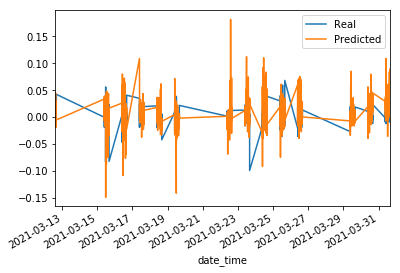

In [20]:
stocks.plot()

In [21]:
real_prices

array([[-1.81857860e-04],
       [ 1.11317254e-03],
       [ 3.01966598e-03],
       ...,
       [-4.68847677e-05],
       [-4.27713323e-03],
       [-5.85988594e-03]])

In [22]:
combined_df.tail()

,close,vol,spy,return,Beta,WR,RSI,OBV,sentiment_vader,sentiment_rnn,us2y10y,vix,usdjpy,target_return
date_time,,,,,,,,,,,,,,
2021-03-31 15:54:00,192.451,19272,396.600,0.001306,2.914251,-9.956367,72.658641,67663735.0,0.0,0.0,157.321,18.89,110.75,-0.002447
2021-03-31 15:55:00,191.980,15778,396.345,-0.002447,2.943117,0.000000,70.208991,67647957.0,0.0,0.0,157.142,19.01,110.73,-0.000104
2021-03-31 15:56:00,191.960,13801,396.520,-0.000104,2.864469,-27.447552,63.737565,67634156.0,0.0,0.0,156.964,18.99,110.73,-0.000047
2021-03-31 15:57:00,191.951,21260,396.520,-0.000047,2.920564,-28.613054,60.113960,67612896.0,0.0,0.0,157.142,18.97,110.73,-0.004277
2021-03-31 15:58:00,191.130,20765,396.830,-0.004277,2.420114,-29.137529,52.606528,67592131.0,0.0,0.0,157.142,18.95,110.72,-0.005860


In [23]:
real_prices[-1]

array([-0.00585989])

In [33]:
# List the features sorted in descending order by feature importance
importances = combined_df.feature_importances_
sorted(zip(combined_df.feature_importances_, X.columns), reverse=True)


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(combined_df.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'